In [ ]:
# importing the necessary libraries
import os
import cv2
import random
import matplotlib.pyplot as plt


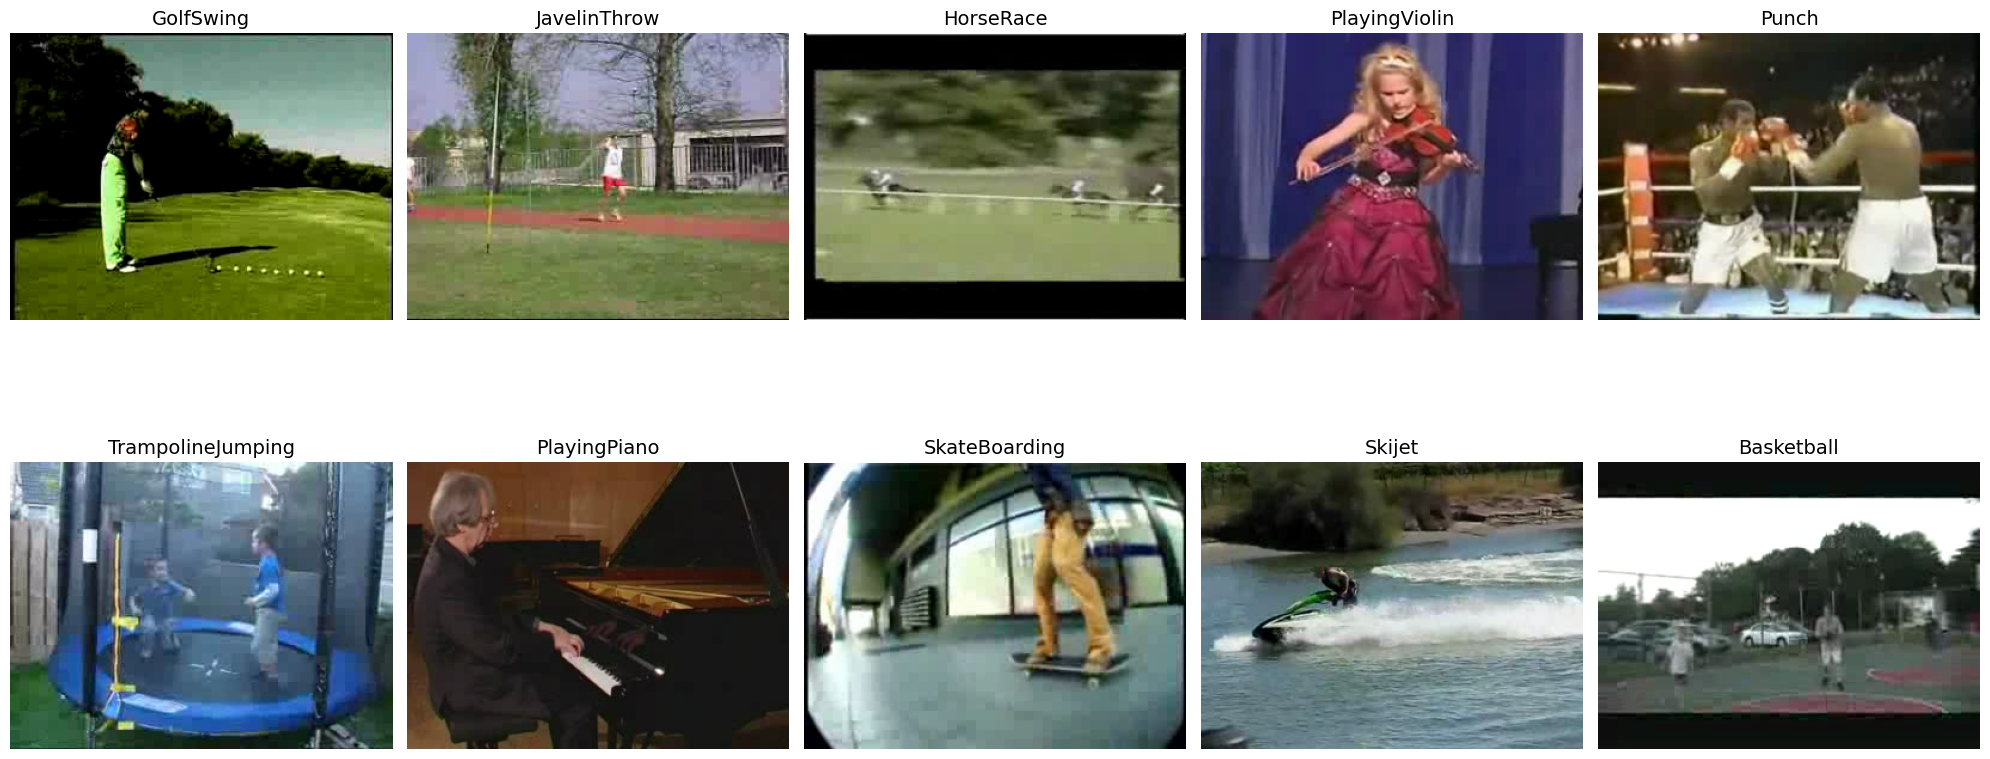

In [ ]:
import os
import random
import cv2
import matplotlib.pyplot as plt

# Define the path to the UCF50 dataset
dataset_path = 'UCF50'

# Get a list of all classes in UCF50
all_classes = [name for name in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, name))]

# Randomly select 10 classes from the dataset
random_classes = random.sample(all_classes, 10)

# Calculate the number of rows and columns for the grid
num_rows = 2
num_cols = 5

# Create a Matplotlib figure and set its size
plt.figure(figsize=(20, 10))

# Loop through the randomly selected classes
for index, class_name in enumerate(random_classes, 1):
    # Find the directory for the current class
    class_directory = os.path.join(dataset_path, class_name)

    # Get a list of all video files in the class directory
    video_files = os.listdir(class_directory)

    # Choose a random video file from the class
    random_video_file = random.choice(video_files)

    # Read the first frame of the video
    video_path = os.path.join(class_directory, random_video_file)
    video_capture = cv2.VideoCapture(video_path)
    _, frame = video_capture.read()
    video_capture.release()

    # Convert the BGR frame to RGB
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Calculate the index for the subplot
    row_index = (index - 1) // num_cols
    col_index = (index - 1) % num_cols

    # Display the frame in a subplot
    plt.subplot(num_rows, num_cols, index)
    plt.imshow(frame_rgb)
    plt.title(class_name, fontsize=14)
    plt.axis('off')

# Adjust layout and display the figure
plt.tight_layout()
plt.show()


In [ ]:
import os
import cv2

# Specify the path to the UCF50 dataset
dataset_path = 'UCF50'

# Function to calculate the average duration and average number of frames per video
def calculate_video_stats(video_files, class_dir):
    total_duration = 0
    total_frames = 0
    num_videos = len(video_files)

    for video_file in video_files:
        video_path = os.path.join(class_dir, video_file)
        video_capture = cv2.VideoCapture(video_path)

        # Check if the video file can be opened successfully
        if not video_capture.isOpened():
            print(f"Error: Couldn't read video stream from file '{video_path}'")
            continue

        fps = video_capture.get(cv2.CAP_PROP_FPS)
        num_frames = int(video_capture.get(cv2.CAP_PROP_FRAME_COUNT))
        duration = num_frames / fps
        total_duration += duration
        total_frames += num_frames
        video_capture.release()

    if num_videos != 0:
        average_duration = total_duration / num_videos
        average_frames = total_frames / num_videos
    else:
        average_duration = 0
        average_frames = 0

    return num_videos, average_duration, average_frames

# Get the names of all classes/categories in UCF50
all_classes_names = [name for name in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, name))]

# Total number of classes
total_classes = len(all_classes_names)
print("Total number of classes in UCF50:", total_classes)

# Total number of videos in UCF50
total_videos = 0

# Iterate through all classes
for class_name in all_classes_names:
    class_dir = os.path.join(dataset_path, class_name)
    video_files = os.listdir(class_dir)
    num_videos, average_duration, average_frames = calculate_video_stats(video_files, class_dir)

    total_videos += num_videos

    # Display number of videos, average duration, and average number of frames per video for each class
    print(f"\nClass: {class_name}")
    print(f"Number of videos: {num_videos}")
    print(f"Average duration (in seconds): {average_duration:.2f}")
    print(f"Average number of frames per video: {average_frames:.2f}")

# Display total number of videos in UCF50
print("\nTotal number of videos in UCF50:", total_videos)


Total number of classes in UCF50: 50

Class: Mixing
Number of videos: 141
Average duration (in seconds): 4.63
Average number of frames per video: 115.65

Class: TennisSwing
Number of videos: 167
Average duration (in seconds): 5.31
Average number of frames per video: 159.13

Class: HorseRiding
Number of videos: 197
Average duration (in seconds): 6.60
Average number of frames per video: 197.73

Class: JumpRope
Number of videos: 148
Average duration (in seconds): 14.58
Average number of frames per video: 436.84

Class: JumpingJack
Number of videos: 123
Average duration (in seconds): 2.82
Average number of frames per video: 84.50

Class: BaseballPitch
Number of videos: 150
Average duration (in seconds): 3.33
Average number of frames per video: 99.80

Class: Rowing
Number of videos: 137
Average duration (in seconds): 13.23
Average number of frames per video: 330.87

Class: SkateBoarding
Number of videos: 120
Average duration (in seconds): 5.50
Average number of frames per video: 137.38

Cla

In [ ]:
import os
import cv2

# Define the path to the UCF50 dataset
dataset_path = 'UCF50'

# Get a list of all classes in UCF50
all_classes = [name for name in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, name))]

# Iterate over each class
for class_name in all_classes:
    print(f"Class: {class_name}")

    # Find the directory for the class
    class_directory = os.path.join(dataset_path, class_name)

    # Initialize variables to store total counts
    total_videos = 0
    total_frame_count = 0
    total_duration = 0

    # Get a list of all video files in the class directory
    video_files = os.listdir(class_directory)

    # Iterate over each video in the class
    for video_file in video_files:
        # Read the video properties
        video_path = os.path.join(class_directory, video_file)
        video_capture = cv2.VideoCapture(video_path)
        frame_count = int(video_capture.get(cv2.CAP_PROP_FRAME_COUNT))
        frame_width = int(video_capture.get(cv2.CAP_PROP_FRAME_WIDTH))
        frame_height = int(video_capture.get(cv2.CAP_PROP_FRAME_HEIGHT))
        frame_rate = video_capture.get(cv2.CAP_PROP_FPS)
        video_duration = frame_count / frame_rate
        codec_info = video_capture.get(cv2.CAP_PROP_FOURCC)

        # Update total counts
        total_videos += 1
        total_frame_count += frame_count
        total_duration += video_duration

        # Release the video capture object
        video_capture.release()

    # Calculate average statistics
    if total_videos > 0:
        average_frame_count = total_frame_count / total_videos
        average_duration = total_duration / total_videos
        print(f"  Average Frame Count: {average_frame_count:.2f}")
        print(f"  Average Duration: {average_duration:.2f} seconds")
        print(f"  Frame Dimensions: {frame_width}x{frame_height}")
        print(f"  Frame Rate: {frame_rate} FPS")
        print(f"  Codec Information: {codec_info}")

    print()


Class: Mixing
  Average Frame Count: 115.65
  Average Duration: 4.63 seconds
  Frame Dimensions: 320x240
  Frame Rate: 25.0 FPS
  Codec Information: 877677894.0

Class: TennisSwing
  Average Frame Count: 159.13
  Average Duration: 5.31 seconds
  Frame Dimensions: 320x240
  Frame Rate: 29.97002997002997 FPS
  Codec Information: 877677894.0

Class: HorseRiding
  Average Frame Count: 197.73
  Average Duration: 6.60 seconds
  Frame Dimensions: 320x240
  Frame Rate: 29.97002997002997 FPS
  Codec Information: 877677894.0

Class: JumpRope
  Average Frame Count: 436.84
  Average Duration: 14.58 seconds
  Frame Dimensions: 320x240
  Frame Rate: 29.97002997002997 FPS
  Codec Information: 877677894.0

Class: JumpingJack
  Average Frame Count: 84.50
  Average Duration: 2.82 seconds
  Frame Dimensions: 320x240
  Frame Rate: 29.97002997002997 FPS
  Codec Information: 877677894.0

Class: BaseballPitch
  Average Frame Count: 99.80
  Average Duration: 3.33 seconds
  Frame Dimensions: 320x240
  Frame Ra

In [ ]:
import os
import shutil

# Define the dataset path and selected activities
dataset_path = 'UCF50'
selected_activities = ["BenchPress", "JumpingJack", "JumpRope", "Lunges", "PullUps", "PushUps"]

# Define the path for the 'gym' folder
gym_folder_path = os.path.join(dataset_path, '..', 'gym')  # Outside the 'UCF50' directory
os.makedirs(gym_folder_path, exist_ok=True)

# Iterate over selected activities
for activity in selected_activities:
    activity_path = os.path.join(dataset_path, activity)
    gym_activity_path = os.path.join(gym_folder_path, activity)

    # Check if the activity folder already exists in the 'gym' directory
    if not os.path.exists(gym_activity_path):
        # Copy the activity folder to the 'gym' directory
        shutil.copytree(activity_path, gym_activity_path)
        print(f"Activity '{activity}' copied to the 'gym' folder.")
    else:
        print(f"Activity '{activity}' already exists in the 'gym' folder.")

print("Gym folder created.")


Activity 'BenchPress' copied to the 'gym' folder.
Activity 'JumpingJack' copied to the 'gym' folder.
Activity 'JumpRope' copied to the 'gym' folder.
Activity 'Lunges' copied to the 'gym' folder.
Activity 'PullUps' copied to the 'gym' folder.
Activity 'PushUps' copied to the 'gym' folder.
Gym folder created.


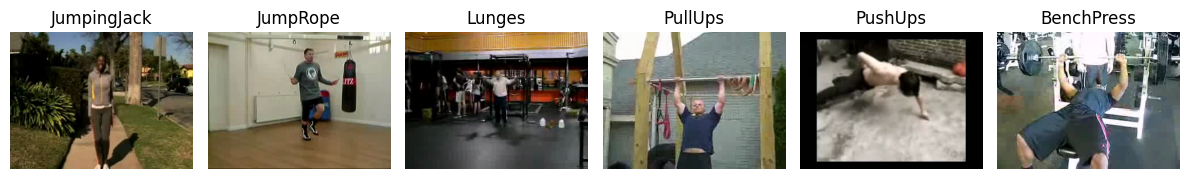

In [ ]:
import os
import random
import cv2
import matplotlib.pyplot as plt

# Define the list of activity folders
activity_folders = ["JumpingJack", "JumpRope", "Lunges", "PullUps", "PushUps", "BenchPress"]

# Initialize a list to store images
image_list = []

# Function to load and append an image to the list
def load_image(video_path):
    cap = cv2.VideoCapture(video_path)
    ret, frame = cap.read()
    if ret:
        image_list.append(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    cap.release()

# Iterate through each activity folder
for activity_folder in activity_folders:
    # Get the list of video files in the current activity folder
    video_files = os.listdir(os.path.join("gym", activity_folder))

    # Randomly select one video file from the list
    selected_video = random.choice(video_files)

    # Load the selected video and append its first frame as an image
    load_image(os.path.join("gym", activity_folder, selected_video))

# Create a figure and axis object
fig, axs = plt.subplots(1, len(image_list), figsize=(12, 3))  # Adjust figsize as needed

# Loop through the images and display them
for i, image in enumerate(image_list):
    axs[i].imshow(image)
    axs[i].axis('off')  # Turn off axis
    axs[i].set_title(f'{activity_folders[i]}')  # Set title as activity name

plt.tight_layout()  # Adjust layout for better spacing
plt.show()


########## Method 1 - Using Mediapipe pose estimator corodinates to detect gym activities     ###########

In [ ]:
# Creating a csv file with extracted pose estimators values using mediapipe
!pip install mediapipe==0.10.9


In [ ]:
pip show mediapipe


Name: mediapipe
Version: 0.10.9
Summary: MediaPipe is the simplest way for researchers and developers to build world-class ML solutions and applications for mobile, edge, cloud and the web.
Home-page: https://github.com/google/mediapipe
Author: The MediaPipe Authors
Author-email: mediapipe@google.com
License: Apache 2.0
Location: /Users/nithishreddy/Desktop/Final Project/env/lib/python3.11/site-packages
Requires: absl-py, attrs, flatbuffers, matplotlib, numpy, opencv-contrib-python, protobuf, sounddevice
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip show mediapipe


Name: mediapipe
Version: 0.10.9
Summary: MediaPipe is the simplest way for researchers and developers to build world-class ML solutions and applications for mobile, edge, cloud and the web.
Home-page: https://github.com/google/mediapipe
Author: The MediaPipe Authors
Author-email: mediapipe@google.com
License: Apache 2.0
Location: /Users/nithishreddy/Desktop/Final Project/env/lib/python3.11/site-packages
Requires: absl-py, attrs, flatbuffers, matplotlib, numpy, opencv-contrib-python, protobuf, sounddevice
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import os
import cv2
import mediapipe as mp
import csv

# Initialize Mediapipe Pose Estimator
mp_pose = mp.solutions.pose.Pose(
    model_complexity=0,  # Use lite model
    min_detection_confidence=0.5,  # Minimum confidence score for detection
    min_tracking_confidence=0.5  # Minimum confidence score for tracking
)

# Load the local model file
model_path = 'pose_landmarker_lite.task'

# Define dataset paths
dataset_path = 'gym'  # Path to the gym videos folder
output_csv_file = 'mediapipe.csv'  # Output CSV file to store pose data
frame_interval_seconds = 2  # Interval in seconds for frame sampling

# Define pose landmark labels
landmark_labels = [
    "nose", "left_eye_inner", "left_eye", "left_eye_outer", "right_eye_inner", "right_eye", "right_eye_outer",
    "left_ear", "right_ear", "mouth_left", "mouth_right", "left_shoulder", "right_shoulder", "left_elbow",
    "right_elbow", "left_wrist", "right_wrist", "left_pinky", "right_pinky", "left_index", "right_index",
    "left_thumb", "right_thumb", "left_hip", "right_hip", "left_knee", "right_knee", "left_ankle", "right_ankle",
    "left_heel", "right_heel", "left_foot_index", "right_foot_index"
]

# Map landmark labels to numeric indices
landmark_label_to_index = {label: index for index, label in enumerate(landmark_labels)}

# Open CSV file for writing
with open(output_csv_file, mode='w', newline='') as csvfile:
    fieldnames = ['Activity', 'Video_File', 'Frame_Count', 'Video_Length', 'Frame_Number', 'Timestamp', 'Actual_Time', 'FPS']
    for i in range(33):
        fieldnames.extend([f'Landmark_{i}_Label', f'Landmark_{i}_X', f'Landmark_{i}_Y', f'Landmark_{i}_Z', f'Landmark_{i}_Visibility'])
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()

    # Iterate through each activity folder
    for activity_folder in os.listdir(dataset_path):
        activity_path = os.path.join(dataset_path, activity_folder)
        if not os.path.isdir(activity_path):
            continue

        # Iterate through each video file in the activity folder
        for video_file in os.listdir(activity_path):
            video_path = os.path.join(activity_path, video_file)
            print(f"Processing video: {video_file}")

            cap = cv2.VideoCapture(video_path)
            frame_number = 0
            last_timestamp_sec = 0
            fps = cap.get(cv2.CAP_PROP_FPS)  # Get FPS dynamically
            frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))  # Get total frame count
            video_length = frame_count / fps  # Calculate total video length

            # Iterate through each frame in the video
            while cap.isOpened():
                ret, frame = cap.read()
                if not ret:
                    break

                # Check if current timestamp exceeds the sampling interval
                if last_timestamp_sec >= frame_interval_seconds:
                    # Perform Mediapipe Pose Estimation on the frame
                    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
                    results = mp_pose.process(frame_rgb)

                    # Extract pose landmarks if detected
                    if results.pose_landmarks:
                        # Write pose landmarks data to CSV file
                        row = {'Activity': activity_folder,
                               'Video_File': video_file,
                               'Frame_Count': frame_count,
                               'Video_Length': video_length,
                               'Frame_Number': frame_number,
                               'Timestamp': last_timestamp_sec,
                               'Actual_Time': frame_number * frame_interval_seconds,  # Calculate correct actual time in video
                               'FPS': fps}

                        # Parse pose landmarks and store in separate columns
                        for i, landmark in enumerate(results.pose_landmarks.landmark):
                            row[f'Landmark_{i}_Label'] = landmark_label_to_index[landmark_labels[i]]
                            row[f'Landmark_{i}_X'] = landmark.x
                            row[f'Landmark_{i}_Y'] = landmark.y
                            row[f'Landmark_{i}_Z'] = landmark.z if landmark.HasField('z') else None
                            row[f'Landmark_{i}_Visibility'] = landmark.visibility if landmark.HasField('visibility') else None

                        writer.writerow(row)

                    frame_number += 1
                    last_timestamp_sec = 0  # Reset timestamp

                last_timestamp_sec += 1 / fps

            cap.release()

# Close CSV file
csvfile.close()


I0000 00:00:1713480434.945310       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M2
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


Processing video: v_JumpRope_g02_c05.avi
Processing video: v_JumpRope_g12_c05.avi
Processing video: v_JumpRope_g24_c07.avi
Processing video: v_JumpRope_g25_c02.avi
Processing video: v_JumpRope_g25_c03.avi
Processing video: v_JumpRope_g03_c01.avi
Processing video: v_JumpRope_g13_c01.avi
Processing video: v_JumpRope_g24_c06.avi
Processing video: v_JumpRope_g12_c04.avi
Processing video: v_JumpRope_g02_c04.avi
Processing video: v_JumpRope_g02_c06.avi
Processing video: v_JumpRope_g24_c04.avi
Processing video: v_JumpRope_g03_c03.avi
Processing video: v_JumpRope_g13_c03.avi
Processing video: v_JumpRope_g25_c01.avi
Processing video: v_JumpRope_g13_c02.avi
Processing video: v_JumpRope_g03_c02.avi
Processing video: v_JumpRope_g24_c05.avi
Processing video: v_JumpRope_g02_c07.avi
Processing video: v_JumpRope_g24_c01.avi
Processing video: v_JumpRope_g12_c03.avi
Processing video: v_JumpRope_g02_c03.avi
Processing video: v_JumpRope_g25_c04.avi
Processing video: v_JumpRope_g25_c05.avi
Processing video

In [ ]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('pose_datanew.csv')

# Display the number of rows per class
class_counts = df['Activity'].value_counts()
print(class_counts)


Activity
JumpRope       934
Lunges         363
PullUps        182
JumpingJack    112
BenchPress     109
PushUps         84
Name: count, dtype: int64


In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('mediapipe.csv')

# Display the shape of the dataset (number of rows and columns)
print("Shape of the dataset:", data.shape)

# Display data types of columns
print("\nData types of columns:")
print(data.dtypes)

# Display summary statistics for numerical columns
print("\nSummary statistics for numerical columns:")
print(data.describe())


Shape of the dataset: (2014, 173)

Data types of columns:
Activity                   object
Video_File                 object
Frame_Count                 int64
Video_Length              float64
Frame_Number                int64
                           ...   
Landmark_32_Label           int64
Landmark_32_X             float64
Landmark_32_Y             float64
Landmark_32_Z             float64
Landmark_32_Visibility    float64
Length: 173, dtype: object

Summary statistics for numerical columns:
       Frame_Count  Video_Length  Frame_Number    Timestamp  Actual_Time  \
count  2014.000000   2014.000000   2014.000000  2014.000000  2014.000000   
mean    317.998014     11.107892      2.098808     2.001271     4.197617   
std     163.324579      5.221468      2.081468     0.000963     4.162935   
min      51.000000      2.040000      0.000000     2.000000     0.000000   
25%     193.000000      6.881875      0.000000     2.000000     0.000000   
50%     263.000000     10.360000      2.00

In [ ]:
pip install imbalanced-learn


/opt/homebrew/Cellar/python@3.11/3.11.7_1/Frameworks/Python.framework/Versions/3.11/lib/python3.11/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.0/258.0 kB 2.9 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


Epoch 1/50


/Users/nithishreddy/Desktop/Final Project/env/lib/python3.11/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 910us/step - accuracy: 0.5416 - loss: 1.2351 - val_accuracy: 0.9055 - val_loss: 0.3411
Epoch 2/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 435us/step - accuracy: 0.8584 - loss: 0.3858 - val_accuracy: 0.9254 - val_loss: 0.2647
Epoch 3/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 449us/step - accuracy: 0.9238 - loss: 0.2279 - val_accuracy: 0.9502 - val_loss: 0.1689
Epoch 4/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 643us/step - accuracy: 0.9489 - loss: 0.1506 - val_accuracy: 0.9552 - val_loss: 0.1515
Epoch 5/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step - accuracy: 0.9559 - loss: 0.1234 - val_accuracy: 0.9602 - val_loss: 0.1339
Epoch 6/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step - accuracy: 0.9710 - loss: 0.0872 - val_accuracy: 0.9652 - val_loss: 0.1139
Epoch 7/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step - accuracy: 0.9782 - loss: 0.0734 - val_accuracy: 0.9751 - val_loss: 0.1092
Epoch 8/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step - accuracy: 0.9811 - loss: 0.0625 - val_accurac

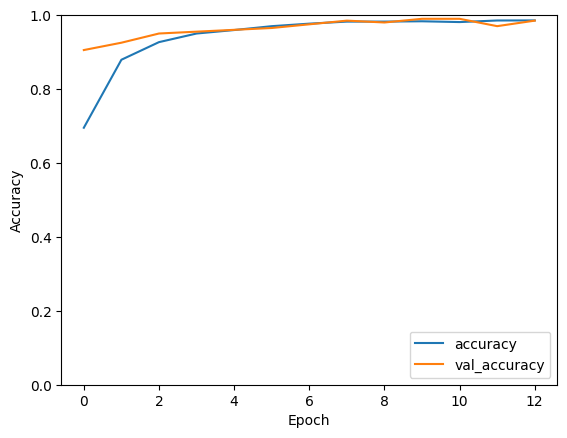

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Load your dataset
df = pd.read_csv("mediapipe.csv")

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the Activity column
df['Activity'] = label_encoder.fit_transform(df['Activity'])

# Separate features and target variable
X = df.iloc[:, 8:].values  # Features
y = df['Activity']  # Target

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Apply SMOTE to address class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Define the new neural network model with regularization
def create_regularized_model():
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X_train_resampled.shape[1],)),
        Dropout(0.2),  # Dropout layer to randomly drop 20% of the neurons
        Dense(64, activation='relu'),
        Dropout(0.2),  # Dropout layer to randomly drop 20% of the neurons
        Dense(6, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Train the model with early stopping
def train_model(model, X_train, y_train, X_val, y_val, epochs=10, batch_size=32):
    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                        validation_data=(X_val, y_val), callbacks=[early_stopping])
    return history

# Create and train the regularized model
regularized_model = create_regularized_model()
regularized_history = train_model(regularized_model, X_train_resampled, y_train_resampled, X_val, y_val, epochs=50, batch_size=32)

# Evaluate the model on the test set
test_loss, test_acc = regularized_model.evaluate(X_test, y_test)

# Print test accuracy
print("Test Accuracy:", test_acc)

# Plot training history
plt.plot(regularized_history.history['accuracy'], label='accuracy')
plt.plot(regularized_history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


Epoch 1/50


/Users/nithishreddy/Desktop/Final Project/env/lib/python3.11/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4401 - loss: 1.5659 - val_accuracy: 0.8095 - val_loss: 0.6793
Epoch 2/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 692us/step - accuracy: 0.7590 - loss: 0.7245 - val_accuracy: 0.8730 - val_loss: 0.4513
Epoch 3/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 655us/step - accuracy: 0.8303 - loss: 0.4930 - val_accuracy: 0.9008 - val_loss: 0.3507
Epoch 4/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 642us/step - accuracy: 0.8690 - loss: 0.3904 - val_accuracy: 0.9187 - val_loss: 0.2992
Epoch 5/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 630us/step - accuracy: 0.8735 - loss: 0.3696 - val_accuracy: 0.9345 - val_loss: 0.2503
Epoch 6/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 598us/step - accuracy: 0.8917 - loss: 0.3017 - val_accuracy: 0.9345 - val_loss: 0.2231
Epoch 7/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 601us/step - accuracy: 0.9055 - loss: 0.2500 - val_accuracy: 0.9484 - val_loss: 0.1904
Epoch 8/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 599us/step - accuracy: 0.9179 - loss: 0.2334 - val_accuracy: 0.9425 - val_lo

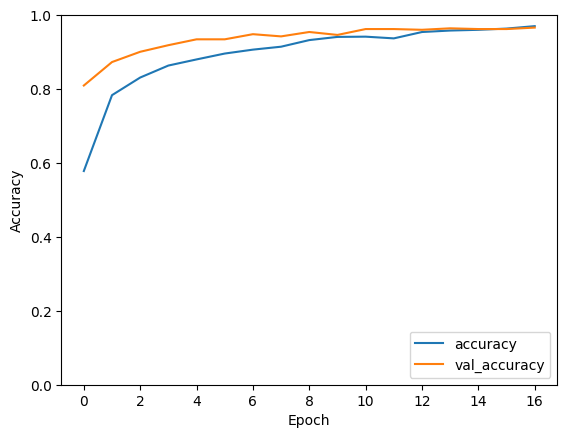

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Load your dataset
df = pd.read_csv("mediapipe.csv")

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the Activity column
df['Activity'] = label_encoder.fit_transform(df['Activity'])

# Separate features and target variable
X = df.iloc[:, 8:].values  # Features
y = df['Activity']  # Target

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

# Define the new neural network model with dropout regularization
def create_regularized_model():
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        Dropout(0.2),  # Dropout layer to randomly drop 20% of the neurons
        Dense(64, activation='relu'),
        Dropout(0.2),  # Dropout layer to randomly drop 20% of the neurons
        Dense(6, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Train the model with early stopping
def train_model(model, X_train, y_train, X_val, y_val, epochs=10, batch_size=32):
    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                        validation_data=(X_val, y_val), callbacks=[early_stopping])
    return history

# Create and train the regularized model
regularized_model = create_regularized_model()
regularized_history = train_model(regularized_model, X_train, y_train, X_test, y_test, epochs=50, batch_size=32)

# Evaluate the model on the test set
test_loss, test_acc = regularized_model.evaluate(X_test, y_test)

# Print test accuracy
print("Test Accuracy:", test_acc)

# Plot training history
plt.plot(regularized_history.history['accuracy'], label='accuracy')
plt.plot(regularized_history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


/Users/nithishreddy/Desktop/Final Project/env/lib/python3.11/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                │ (None, 64)             │        10,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 6)              │           390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,174 (59.27 KB)

 Trainable params: 15,174 (59.27 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3989 - loss: 1.6043 - val_accuracy: 0.7758 - val_loss: 0.7210
Epoch 2/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 717us/step - accuracy: 0.7781 - loss: 0.6789 - val_accuracy: 0.8194 - val_loss: 0.4855
Epoch 3/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 733us/step - accuracy: 0.8420 - loss: 0.5023 - val_accuracy: 0.8631 - val_loss: 0.3934
Epoch 4/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 742us/step - accuracy: 0.8675 - loss: 0.3850 - val_accuracy: 0.8968 - val_loss: 0.3304
Epoch 5/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 747us/step - accuracy: 0.8963 - loss: 0.3085 - val_accuracy: 0.9127 - val_loss: 0.2948
Epoch 6/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 703us/step - accuracy: 0.9006 - loss: 0.2935 - val_accuracy: 0.9187 - val_loss: 0.2480
Epoch 7/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 659us/step - accuracy: 0.9032 - loss: 0.2738 - val_accuracy: 0.9286 - val_loss: 0.2204
Epoch 8/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 830us/step - accuracy: 0.9289 - loss: 0.2236 - val_accuracy: 0.9

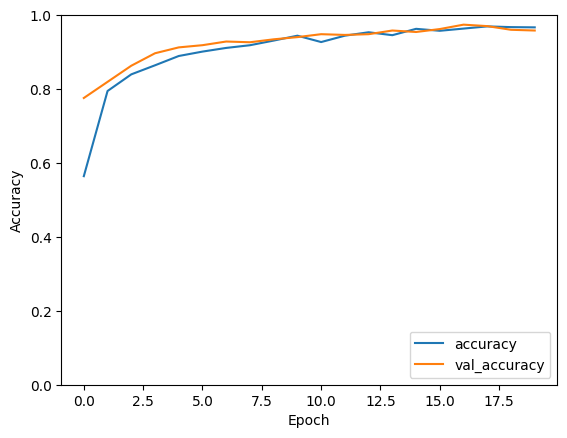

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Load your dataset
df = pd.read_csv("mediapipe.csv")

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the Activity column
df['Activity'] = label_encoder.fit_transform(df['Activity'])

# Separate features and target variable
X = df.iloc[:, 8:].values  # Features
y = df['Activity']  # Target

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and test sets with stratified sampling
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42, stratify=y)

# Define the new neural network model with dropout regularization
def create_regularized_model():
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        Dropout(0.2),  # Dropout layer to randomly drop 20% of the neurons
        Dense(64, activation='relu'),
        Dropout(0.2),  # Dropout layer to randomly drop 20% of the neurons
        Dense(6, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Train the model with early stopping
def train_model(model, X_train, y_train, X_val, y_val, epochs=10, batch_size=32):
    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                        validation_data=(X_val, y_val), callbacks=[early_stopping])
    return history

# Create and train the regularized model
regularized_model = create_regularized_model()

# Display model summary
regularized_model.summary()

# Train the regularized model
regularized_history = train_model(regularized_model, X_train, y_train, X_test, y_test, epochs=50, batch_size=32)

# Evaluate the model on the test set
test_loss, test_acc = regularized_model.evaluate(X_test, y_test)

# Print test accuracy
print("Test Accuracy:", test_acc)

# Plot training history
plt.plot(regularized_history.history['accuracy'], label='accuracy')
plt.plot(regularized_history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


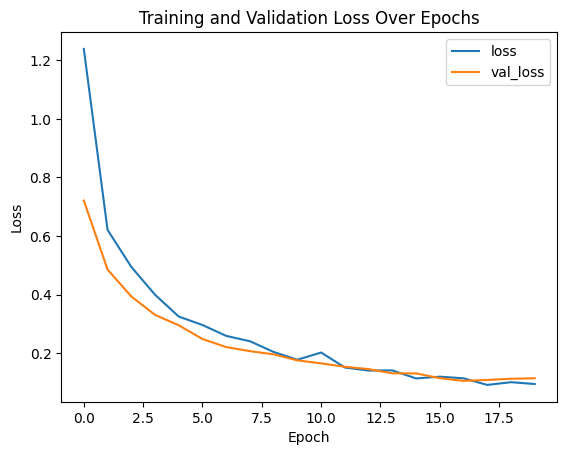

In [ ]:
plt.plot(regularized_history.history['loss'], label='loss')
plt.plot(regularized_history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss Over Epochs')
plt.show()


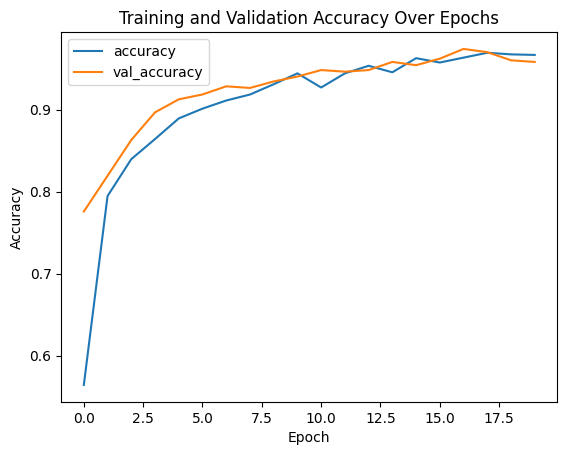

In [ ]:
plt.plot(regularized_history.history['accuracy'], label='accuracy')
plt.plot(regularized_history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy Over Epochs')
plt.show()


In [ ]:
# Predict probabilities on test set
y_pred_prob = regularized_model.predict(X_test)
# Convert probabilities to class labels
y_pred = y_pred_prob.argmax(axis=-1)

# Convert y_test to array if it's not already
y_test = np.array(y_test)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Compute classification report
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step
Confusion Matrix:
[[ 38   0   0   0   0   0]
 [  0 239   1   1   0   0]
 [  0   4  25   0   0   0]
 [  0   0   0 119   1   1]
 [  2   0   1   0  47   0]
 [  1   0   0   1   0  23]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        38
           1       0.98      0.99      0.99       241
           2       0.93      0.86      0.89        29
           3       0.98      0.98      0.98       121
           4       0.98      0.94      0.96        50
           5       0.96      0.92      0.94        25

    accuracy                           0.97       504
   macro avg       0.96      0.95      0.95       504
weighted avg       0.97      0.97      0.97       504



In [ ]:
# demonstation of mediapipe pose estimators

I0000 00:00:1713494478.183675       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M2


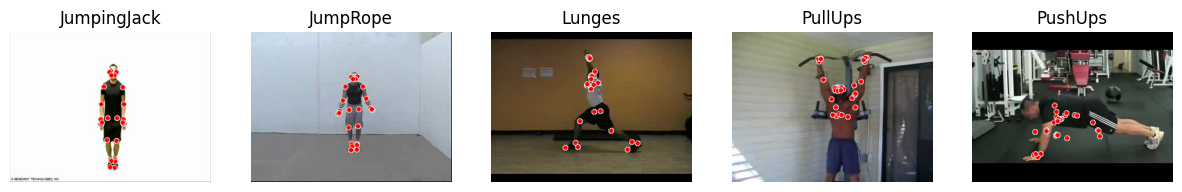

In [ ]:
import os
import cv2
import random
import mediapipe as mp
import matplotlib.pyplot as plt

# Initialize Mediapipe Pose
mp_pose = mp.solutions.pose
pose = mp_pose.Pose()

# Specify the path to the filtered folder containing activity folders
filtered_folder = 'gym'

# Define the activity folders
activity_folders = ["JumpingJack", "JumpRope", "Lunges", "PullUps", "PushUps"]

# Create a Matplotlib figure and set the figure size
fig, axes = plt.subplots(1, 5, figsize=(15, 4))  # 1 row, 5 columns for 5 activity folders

for i, activity_folder in enumerate(activity_folders):
    # List all video files in the selected activity folder
    activity_dir = os.path.join(filtered_folder, activity_folder)
    video_files = os.listdir(activity_dir)

    # Randomly select a video file from the activity folder
    random_video_file = random.choice(video_files)

    # Load the video
    video_path = os.path.join(activity_dir, random_video_file)
    video_capture = cv2.VideoCapture(video_path)

    while video_capture.isOpened():
        ret, frame = video_capture.read()
        if not ret:
            break

        # Convert the frame to RGB format (required by Mediapipe)
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        # Process the frame to perform pose estimation
        results = pose.process(frame_rgb)

        if results.pose_landmarks:
            # Access pose landmarks
            landmarks = results.pose_landmarks

            # Visualize pose landmarks on the frame (optional)
            mp_drawing = mp.solutions.drawing_utils
            mp_drawing.draw_landmarks(frame, landmarks)

        # Display the frame with pose estimation
        axes[i].imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
        axes[i].set_title(activity_folder)  # Set title as activity name
        axes[i].axis('off')

        break  # Break out of the loop after displaying the first frame for each activity

    video_capture.release()

# Release resources and display the result
cv2.destroyAllWindows()
plt.show()


                                                    Method 2 : Using Neural Networks directly on the Images using Mediapipe

In [ ]:
import os
import cv2
import mediapipe as mp
import numpy as np

# Specify the height and width to which each video frame will be resized in our dataset.
IMAGE_HEIGHT, IMAGE_WIDTH = 64, 64

# Specify the number of frames of a video that will be fed to the model as one sequence.
SEQUENCE_LENGTH = 20

# Define the list of activity classes
ACTIVITY_CLASSES = ['BenchPress', 'JumpingJack', 'JumpRope', 'Lunges', 'PullUps', 'PushUps']

# Path to the dataset directory
DATASET_DIR = 'gym'

# Function to extract frames from a video with skeletal images
def extract_frames_with_skeleton(video_path):
    # Create the MediaPipe Pose Estimator instance outside the loop
    pose_estimator = mp.solutions.pose.Pose(
        model_complexity=0,
        min_detection_confidence=0.5,
        min_tracking_confidence=0.5
    )

    frames_list = []
    video_reader = cv2.VideoCapture(video_path)
    video_frames_count = int(video_reader.get(cv2.CAP_PROP_FRAME_COUNT))
    skip_frames_window = max(int(video_frames_count / SEQUENCE_LENGTH), 1)

    for frame_counter in range(SEQUENCE_LENGTH):
        video_reader.set(cv2.CAP_PROP_POS_FRAMES, frame_counter * skip_frames_window)
        success, frame = video_reader.read()

        if not success:
            break

        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        # Use Mediapipe Pose Estimator to detect pose landmarks
        results = pose_estimator.process(frame_rgb)
        if results.pose_landmarks:
            # Draw skeletal image on the frame
            annotated_image = frame.copy()
            mp.solutions.drawing_utils.draw_landmarks(
                annotated_image, results.pose_landmarks, mp.solutions.pose.POSE_CONNECTIONS)
            # Resize the annotated frame to specified dimensions
            resized_frame = cv2.resize(annotated_image, (IMAGE_HEIGHT, IMAGE_WIDTH))
            # Normalize the resized frame by dividing it with 255 so that each pixel value then lies between 0 and 1
            normalized_frame = resized_frame / 255
            frames_list.append(normalized_frame)

    # Release the VideoCapture object outside the loop
    video_reader.release()

    # Close the MediaPipe Pose Estimator instance after using it
    pose_estimator.close()

    return frames_list


# Function to create the dataset
def create_dataset_with_skeleton():
    features = []
    labels = []
    video_files_paths = []

    for class_index, activity_class in enumerate(ACTIVITY_CLASSES):
        print(f'Extracting Data of Activity Class: {activity_class}')
        class_dir = os.path.join(DATASET_DIR, activity_class)

        for file_name in os.listdir(class_dir):
            video_file_path = os.path.join(class_dir, file_name)
            frames = extract_frames_with_skeleton(video_file_path)

            if len(frames) == SEQUENCE_LENGTH:
                features.append(frames)
                labels.append(class_index)
                video_files_paths.append(video_file_path)

    features = np.asarray(features)
    labels = np.array(labels)

    return features, labels, video_files_paths

# Create the dataset
features_with_skeleton, labels_with_skeleton, video_files_paths_with_skeleton = create_dataset_with_skeleton()

# Print the shape of features and labels
print("Features Shape:", features_with_skeleton.shape)
print("Labels Shape:", labels_with_skeleton.shape)


Extracting Data of Activity Class: BenchPress


I0000 00:00:1713499167.534251       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M2
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
I0000 00:00:1713499167.942713       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M2
I0000 00:00:1713499168.317635       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M2
I0000 00:00:1713499168.660381       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M2
I0000 00:00:1713499169.065743       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M2
I0000 00:00:1713499169.396540       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M2
I0000 00:00:1713499169.688807       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M2
I0000 00:00:1713499169.995853       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M2
I0000 00:00:1713499170.326710       1 gl_context.cc:344] GL vers

Extracting Data of Activity Class: JumpingJack


I0000 00:00:1713499222.066342       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M2
I0000 00:00:1713499222.411278       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M2
I0000 00:00:1713499222.744629       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M2
I0000 00:00:1713499223.071092       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M2
I0000 00:00:1713499223.397119       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M2
I0000 00:00:1713499223.765908       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M2
I0000 00:00:1713499224.086473       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M2
I0000 00:00:1713499224.397889       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M2
I0000 00:00:1713499224.734984       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M2
I0000 00:0

Extracting Data of Activity Class: JumpRope


I0000 00:00:1713499261.173255       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M2
I0000 00:00:1713499261.489778       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M2
I0000 00:00:1713499261.802063       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M2
I0000 00:00:1713499262.110361       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M2
I0000 00:00:1713499262.418596       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M2
I0000 00:00:1713499262.733977       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M2
I0000 00:00:1713499263.040953       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M2
I0000 00:00:1713499263.348315       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M2
I0000 00:00:1713499263.664065       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M2
I0000 00:0

Extracting Data of Activity Class: Lunges


I0000 00:00:1713499307.587628       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M2
I0000 00:00:1713499307.907373       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M2
I0000 00:00:1713499308.232678       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M2
I0000 00:00:1713499308.542235       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M2
I0000 00:00:1713499308.868043       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M2
I0000 00:00:1713499309.180003       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M2
I0000 00:00:1713499309.488892       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M2
I0000 00:00:1713499309.803759       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M2
I0000 00:00:1713499310.114070       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M2
I0000 00:0

Extracting Data of Activity Class: PullUps


I0000 00:00:1713499353.448902       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M2
I0000 00:00:1713499353.852771       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M2
I0000 00:00:1713499354.172791       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M2
I0000 00:00:1713499354.490748       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M2
I0000 00:00:1713499354.808396       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M2
I0000 00:00:1713499355.131485       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M2
I0000 00:00:1713499355.444085       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M2
I0000 00:00:1713499355.752326       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M2
I0000 00:00:1713499356.063739       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M2
I0000 00:0

Extracting Data of Activity Class: PushUps


I0000 00:00:1713499391.794678       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M2
I0000 00:00:1713499392.102162       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M2
I0000 00:00:1713499392.409797       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M2
I0000 00:00:1713499392.717728       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M2
I0000 00:00:1713499393.025164       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M2
I0000 00:00:1713499393.330223       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M2
I0000 00:00:1713499393.638076       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M2
I0000 00:00:1713499393.951877       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M2
I0000 00:00:1713499394.259844       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M2
I0000 00:0

Features Shape: (520, 20, 64, 64, 3)
Labels Shape: (520,)


In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Define the seed constant for reproducibility
seed_constant = 42

# One-hot encode the labels
one_hot_encoded_labels = to_categorical(labels_with_skeleton)

# Split the Data into Train (75%) and Test Set (25%)
X_train, X_test, y_train, y_test = train_test_split(features_with_skeleton, one_hot_encoded_labels,
                                                    test_size=0.25, shuffle=True,
                                                    random_state=seed_constant)


In [ ]:
pip install pydot

/opt/homebrew/Cellar/python@3.11/3.11.7_1/Frameworks/Python.framework/Versions/3.11/lib/python3.11/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install pydot graphviz


Note: you may need to restart the kernel to use updated packages.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ConvLSTM2D, MaxPooling3D, TimeDistributed, Dropout, Flatten, Dense
from tensorflow.keras.utils import plot_model

# Specify the height and width to which each video frame will be resized in our dataset.
IMAGE_HEIGHT, IMAGE_WIDTH = 64, 64

# Specify the number of frames of a video that will be fed to the model as one sequence.
SEQUENCE_LENGTH = 20

# Define the list of activity classes
ACTIVITY_CLASSES = ['BenchPress', 'JumpingJack', 'JumpRope', 'Lunges', 'PullUps', 'PushUps']

# Construct the model1
model1 = Sequential()

model1.add(ConvLSTM2D(filters=4, kernel_size=(3, 3), activation='tanh', data_format="channels_last",
                             recurrent_dropout=0.2, return_sequences=True, input_shape=(SEQUENCE_LENGTH,
                                                                                          IMAGE_HEIGHT, IMAGE_WIDTH, 3)))

model1.add(MaxPooling3D(pool_size=(1, 2, 2), padding='same', data_format='channels_last'))
model1.add(TimeDistributed(Dropout(0.2)))

model1.add(ConvLSTM2D(filters=8, kernel_size=(3, 3), activation='tanh', data_format="channels_last",
                             recurrent_dropout=0.2, return_sequences=True))

model1.add(MaxPooling3D(pool_size=(1, 2, 2), padding='same', data_format='channels_last'))
model1.add(TimeDistributed(Dropout(0.2)))

model1.add(ConvLSTM2D(filters=14, kernel_size=(3, 3), activation='tanh', data_format="channels_last",
                             recurrent_dropout=0.2, return_sequences=True))

model1.add(MaxPooling3D(pool_size=(1, 2, 2), padding='same', data_format='channels_last'))
model1.add(TimeDistributed(Dropout(0.2)))

model1.add(ConvLSTM2D(filters=16, kernel_size=(3, 3), activation='tanh', data_format="channels_last",
                             recurrent_dropout=0.2, return_sequences=True))

model1.add(MaxPooling3D(pool_size=(1, 2, 2), padding='same', data_format='channels_last'))
#model1.add(TimeDistributed(Dropout(0.2)))

model1.add(Flatten())

model1.add(Dense(len(ACTIVITY_CLASSES), activation="softmax"))

# Print the model summary
model1.summary()

# Display the success message
print("Model1 Created Successfully!")




/Users/nithishreddy/Desktop/Final Project/env/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv_lstm2d_4 (ConvLSTM2D)      │ (None, 20, 62, 62, 4)  │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling3d_4 (MaxPooling3D)  │ (None, 20, 31, 31, 4)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_3              │ (None, 20, 31, 31, 4)  │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_lstm2d_5 (ConvLSTM2D)      │ (None, 20, 29, 29, 8)  │         3,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling3d_5 (MaxPooling3D)  │ (None, 20, 15, 15, 8)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_4              │ (None, 20, 15, 15, 8)  │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_lstm2d_6 (ConvLSTM2D)      │ (None, 20, 13, 13, 14) │        11,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling3d_6 (MaxPooling3D)  │ (None, 20, 7, 7, 14)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_5              │ (None, 20, 7, 7, 14)   │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_lstm2d_7 (ConvLSTM2D)      │ (None, 20, 5, 5, 16)   │        17,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling3d_7 (MaxPooling3D)  │ (None, 20, 3, 3, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2880)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │        17,286 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,286 (196.43 KB)

 Trainable params: 50,286 (196.43 KB)

 Non-trainable params: 0 (0.00 B)

Model1 Created Successfully!


In [ ]:
pip install opencv-python-headless


In [ ]:
pip install numpy


In [ ]:
pip install moviepy


In [ ]:
pip install tensorflow


In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

# Define the seed constant for reproducibility
seed_constant = 42

# Assuming `labels_with_skeleton` is defined elsewhere in your code

# Split the Data into Train (75%) and Test Set (25%)
X_train, X_test, y_train, y_test = train_test_split(features_with_skeleton, labels_with_skeleton,
                                                    test_size=0.25, shuffle=True,
                                                    random_state=seed_constant)

# One-hot encode the labels
one_hot_encoded_labels_train = to_categorical(y_train)
one_hot_encoded_labels_test = to_categorical(y_test)

# Create an instance of EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, mode='min', restore_best_weights=True)

# Compile the model and specify loss function, optimizer, and metrics values
model1.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=["accuracy"])

# Start training the model
history = model1.fit(x=X_train, y=one_hot_encoded_labels_train, epochs=50, batch_size=4,
                     shuffle=True, validation_split=0.2, callbacks=[early_stopping])


Epoch 1/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 27s 272ms/step - accuracy: 0.2358 - loss: 1.7601 - val_accuracy: 0.2692 - val_loss: 1.6533
Epoch 2/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 22s 278ms/step - accuracy: 0.3386 - loss: 1.6067 - val_accuracy: 0.3846 - val_loss: 1.4302
Epoch 3/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 24s 301ms/step - accuracy: 0.6012 - loss: 1.0499 - val_accuracy: 0.5256 - val_loss: 1.3046
Epoch 4/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 24s 303ms/step - accuracy: 0.6631 - loss: 0.8939 - val_accuracy: 0.6410 - val_loss: 0.9669
Epoch 5/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 24s 308ms/step - accuracy: 0.8079 - loss: 0.5576 - val_accuracy: 0.7436 - val_loss: 0.7793
Epoch 6/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 24s 304ms/step - accuracy: 0.9016 - loss: 0.3648 - val_accuracy: 0.7821 - val_loss: 0.6698
Epoch 7/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 24s 301ms/step - accuracy: 0.9013 - loss: 0.2314 - val_accuracy: 0.7692 - val_loss: 0.6786
Epoch 8/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 24s 302ms/step - accuracy: 0.9426 - loss: 0.2413 - val_accu

In [ ]:
print("Shape of y_test:", y_test.shape)
print("Shape of X_test:", X_test.shape)


Shape of y_test: (130,)
Shape of X_test: (130, 20, 64, 64, 3)


In [ ]:
from tensorflow.keras.utils import to_categorical

# One-hot encode the labels
one_hot_encoded_labels_test = to_categorical(y_test)

# Evaluate the model using the one-hot encoded labels
model_evaluation = model1.evaluate(X_test, one_hot_encoded_labels_test)

# Extract the accuracy from the evaluation history
accuracy = model_evaluation[1]

print("Test Accuracy:", accuracy)


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 294ms/step - accuracy: 0.8079 - loss: 0.5864
Test Accuracy: 0.807692289352417


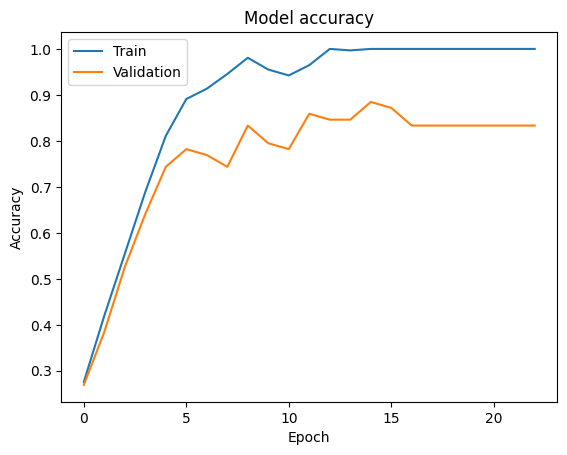

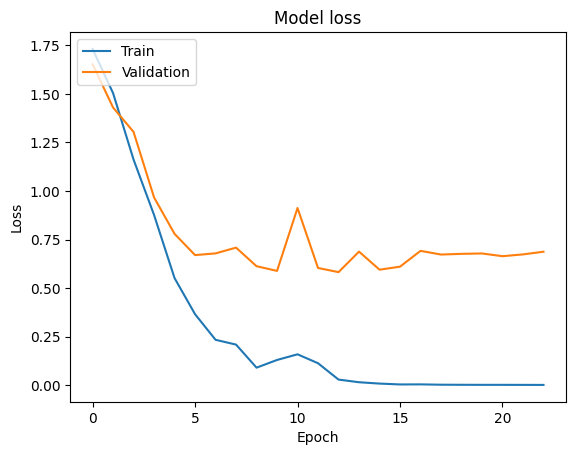

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [ ]:
pip install seaborn

/opt/homebrew/Cellar/python@3.11/3.11.7_1/Frameworks/Python.framework/Versions/3.11/lib/python3.11/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 1.6 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 274ms/step
Accuracy: 0.8076923076923077
Precision: 0.8149372995425628
Recall: 0.8076923076923077
F1 Score: 0.8051660190117698
ROC-AUC Score: 0.969671474115966
PR-AUC Score: 0.9089660681561865
Confusion Matrix:
 [[11  0  0  0  1  0]
 [ 0 22  4  0  1  0]
 [ 0  1 27  0  0  0]
 [ 1  0  4 15  2  2]
 [ 0  1  0  1 11  1]
 [ 2  0  0  3  1 19]]


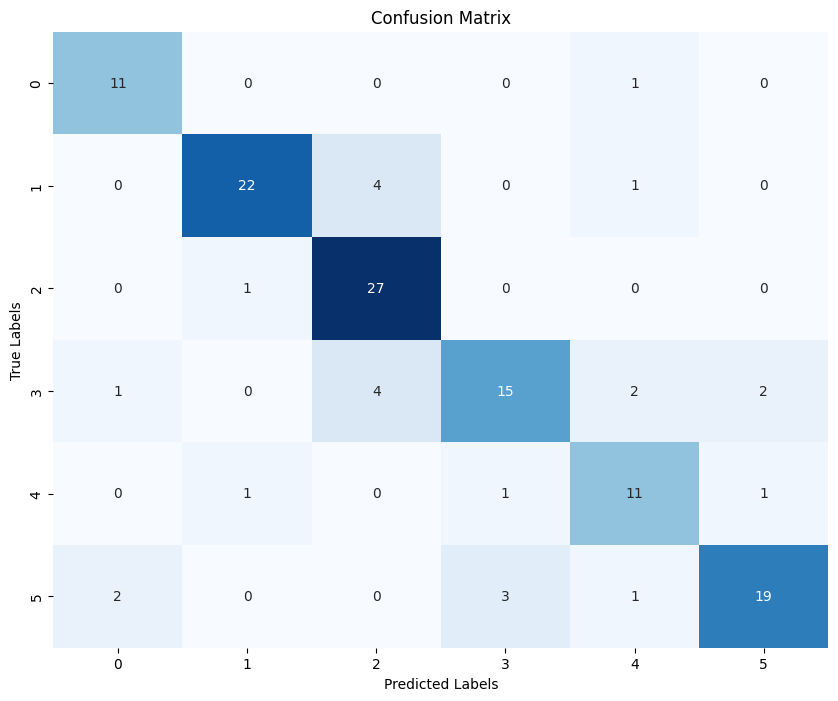

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Compute predicted probabilities
y_pred_prob = model1.predict(X_test)

# Get predicted class labels
y_pred = np.argmax(y_pred_prob, axis=1)

# Compute classification metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, y_pred_prob, average='weighted', multi_class='ovr')
pr_auc = average_precision_score(y_test, y_pred_prob, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

# Print classification metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC-AUC Score:", roc_auc)
print("PR-AUC Score:", pr_auc)
print("Confusion Matrix:\n", conf_matrix)

# Plot Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
model1.save("convlstm_model.h5")

Applying  different model  

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, LSTM, Dense, Dropout, Flatten, TimeDistributed

# Assign the height and width to which each video frame will be resized in our dataset.
IMAGE_HEIGHT, IMAGE_WIDTH = 64, 64

# Assign the number of frames of a video that will be fed to the model as one sequence.
SEQUENCE_LENGTH = 20

def create_model2():
    '''
    This function constructs the required model2.
    Returns:
        model2: The constructed model2.
    '''

    # We will use a Sequential model for model construction.
    model2 = Sequential()

    # Define the Model Architecture.
    ########################################################################################################################

    model2.add(TimeDistributed(Conv2D(16, (3, 3), padding='same', activation='relu'),
                              input_shape=(SEQUENCE_LENGTH, IMAGE_HEIGHT, IMAGE_WIDTH, 3)))

    model2.add(TimeDistributed(MaxPooling2D((4, 4))))
    model2.add(TimeDistributed(Dropout(0.25)))

    model2.add(TimeDistributed(Conv2D(32, (3, 3), padding='same', activation='relu')))
    model2.add(TimeDistributed(MaxPooling2D((4, 4))))
    model2.add(TimeDistributed(Dropout(0.25)))

    model2.add(TimeDistributed(Conv2D(64, (3, 3), padding='same', activation='relu')))
    model2.add(TimeDistributed(MaxPooling2D((2, 2))))
    model2.add(TimeDistributed(Dropout(0.25)))

    model2.add(TimeDistributed(Conv2D(64, (3, 3), padding='same', activation='relu')))
    model2.add(TimeDistributed(MaxPooling2D((2, 2))))

    model2.add(TimeDistributed(Flatten()))

    model2.add(LSTM(32))

    model2.add(Dense(len(ACTIVITY_CLASSES), activation='softmax'))

    ########################################################################################################################

    # Display the model summary.
    model2.summary()

    # Return the constructed model2.
    return model2

# Construct the required model2.
model2 = create_model2()

# Display the success message.
print("Model2 Created Successfully!")


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ time_distributed_18             │ (None, 20, 64, 64, 16) │           448 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_19             │ (None, 20, 16, 16, 16) │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_20             │ (None, 20, 16, 16, 16) │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_21             │ (None, 20, 16, 16, 32) │         4,640 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_22             │ (None, 20, 4, 4, 32)   │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_23             │ (None, 20, 4, 4, 32)   │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_24             │ (None, 20, 4, 4, 64)   │        18,496 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_25             │ (None, 20, 2, 2, 64)   │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_26             │ (None, 20, 2, 2, 64)   │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_27             │ (None, 20, 2, 2, 64)   │        36,928 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_28             │ (None, 20, 1, 1, 64)   │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_29             │ (None, 20, 64)         │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 6)              │           198 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 73,126 (285.65 KB)

 Trainable params: 73,126 (285.65 KB)

 Non-trainable params: 0 (0.00 B)

Model2 Created Successfully!


In [ ]:
# Create an Instance of Early Stopping Callback.
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 15, mode = 'min', restore_best_weights = True)

# Compile the model and specify loss function, optimizer and metrics to the model.
model2.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ["accuracy"])

# Start training the model.
history2 = model2.fit(x=X_train, y=one_hot_encoded_labels_train, epochs = 70, batch_size = 4 ,
                                             shuffle = True, validation_split = 0.2, callbacks = [early_stopping_callback])

Epoch 1/70
78/78 ━━━━━━━━━━━━━━━━━━━━ 17s 99ms/step - accuracy: 0.2536 - loss: 1.7289 - val_accuracy: 0.2692 - val_loss: 1.7168
Epoch 2/70
78/78 ━━━━━━━━━━━━━━━━━━━━ 7s 89ms/step - accuracy: 0.2799 - loss: 1.6660 - val_accuracy: 0.2692 - val_loss: 1.6899
Epoch 3/70
78/78 ━━━━━━━━━━━━━━━━━━━━ 7s 95ms/step - accuracy: 0.3322 - loss: 1.6458 - val_accuracy: 0.4103 - val_loss: 1.6760
Epoch 4/70
78/78 ━━━━━━━━━━━━━━━━━━━━ 8s 96ms/step - accuracy: 0.3161 - loss: 1.6816 - val_accuracy: 0.3846 - val_loss: 1.5521
Epoch 5/70
78/78 ━━━━━━━━━━━━━━━━━━━━ 7s 94ms/step - accuracy: 0.4327 - loss: 1.4554 - val_accuracy: 0.5000 - val_loss: 1.2684
Epoch 6/70
78/78 ━━━━━━━━━━━━━━━━━━━━ 7s 95ms/step - accuracy: 0.4610 - loss: 1.2868 - val_accuracy: 0.5128 - val_loss: 1.2107
Epoch 7/70
78/78 ━━━━━━━━━━━━━━━━━━━━ 8s 96ms/step - accuracy: 0.6053 - loss: 1.0369 - val_accuracy: 0.6154 - val_loss: 0.9263
Epoch 8/70
78/78 ━━━━━━━━━━━━━━━━━━━━ 8s 96ms/step - accuracy: 0.6500 - loss: 0.9040 - val_accuracy: 0.6282 - 

In [ ]:
from tensorflow.keras.utils import to_categorical

# One-hot encode the labels
one_hot_encoded_labels_test = to_categorical(y_test)

# Evaluate the model using the one-hot encoded labels
model_evaluation = model2.evaluate(X_test, one_hot_encoded_labels_test)

# Extract the accuracy from the evaluation history
accuracy = model_evaluation[1]

print("Test Accuracy:", accuracy)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step - accuracy: 0.9002 - loss: 0.3738
Test Accuracy: 0.9076923131942749


In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Compute predicted probabilities
y_pred_prob = model2.predict(X_test)

# Get predicted class labels
y_pred = np.argmax(y_pred_prob, axis=1)

# Compute classification metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, y_pred_prob, average='weighted', multi_class='ovr')
pr_auc = average_precision_score(y_test, y_pred_prob, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

# Print classification metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC-AUC Score:", roc_auc)
print("PR-AUC Score:", pr_auc)
print("Confusion Matrix:\n", conf_matrix)

# Plot Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Plot Loss and Accuracy over Epochs
plt.figure(figsize=(12, 6))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


NameError: name 'model2' is not defined